In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras.layers import RepeatVector
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, confusion_matrix

In [6]:
# Load the dataset from CSV file
data = pd.read_csv('dataset.csv')
data.head(135)

,Sr. No.,Code,Algorithm
0,1,"num1 = 15 num2 = 12 sum = num1 + num2 print(""S...","Step 1: Read A , B Step 2: Let Sum= A+B Step 3..."
1,2,"num1 = 15 num2 = 12 prod = num1 * num2 print(""...","Step 1: Read A , B Step 2: Let Product=A*B Ste..."
2,3,x = 5 y = 10 temp = x x = y y = temp print('Th...,[Initialize the variables] A = 2 B = 3 2. [Pef...
3,4,"x = 5 y = 10 x, y = y, x print(""x ="", x) print...",1. [Initialize the variables] A = 2 B = 3 2. x...
4,5,"a=[] n=int(input(""Enter number of elements:""))...",1. Take in the number of elements and store it...
...,...,...,...
130,131,"exp = ""45+98-10""\r\nstack = []\r\ni = 0\r\nwhi...",1. Take input of the string containing the exp...
131,132,import re\r\n\r\ndef evaluate_expression(expre...,1. Import the re module for regular expression...
132,133,# Class to make a Node\r\nclass Node:\r\n ...,"1. If stack is empty, insert x into the stack ..."
133,134,# Python3 program to implement Queue using\r\n...,"1. While stack1 is not empty, push everything ..."


In [7]:
# Convert the python code strings into a numerical representation using one-hot encoding
enc = OneHotEncoder()
enc.fit(data)
df = enc.transform(data)

In [8]:
# Split the dataset into training and testing sets
train_size = int(df.shape[0] * 0.8)
X = df[:, :-1]
y = df[:, -1].toarray().ravel()
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
X_train = X_train.toarray()
X_test = X_test.toarray()
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [9]:
# Define the Encoder-Decoder LSTM model
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
encoder = LSTM(128)(inputs)
decoder = RepeatVector(X_train.shape[1])(encoder)
decoder = LSTM(128, return_sequences=True)(decoder)
outputs = Dense(X_train.shape[2], activation='softmax')(decoder)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# Train the model on the training set
history = model.fit(X_train, X_train, epochs=90, validation_data=(X_test, X_test), batch_size=28)

Epoch 1/90
4/4 [==============================] - 15s 2s/step - loss: 0.9923 - val_loss: 0.9923
Epoch 2/90
4/4 [==============================] - 5s 1s/step - loss: 0.9923 - val_loss: 0.9923
Epoch 3/90
4/4 [==============================] - 6s 1s/step - loss: 0.9923 - val_loss: 0.9923
Epoch 4/90
4/4 [==============================] - 6s 2s/step - loss: 0.9923 - val_loss: 0.9923
Epoch 5/90
4/4 [==============================] - 6s 2s/step - loss: 0.9923 - val_loss: 0.9923
Epoch 6/90
4/4 [==============================] - 6s 2s/step - loss: 0.9923 - val_loss: 0.9923
Epoch 7/90
4/4 [==============================] - 6s 1s/step - loss: 0.9923 - val_loss: 0.9923
Epoch 8/90
4/4 [==============================] - 5s 1s/step - loss: 0.9923 - val_loss: 0.9923
Epoch 9/90
4/4 [==============================] - 5s 1s/step - loss: 0.9923 - val_loss: 0.9923
Epoch 10/90
4/4 [==============================] - 5s 1s/step - loss: 0.9923 - val_loss: 0.9923
Epoch 11/90
4/4 [==============================]

In [11]:
# Evaluate the performance of the model on the testing set
from sklearn.metrics import accuracy_score
y_pred = np.argmax(model.predict(X_test), axis=1)
loss = model.evaluate(X_test, X_test)
print("Test loss:", loss)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)

f1 = f1_score(y_test, y_pred, average='macro')
print("F1 score", f1)

1/1 [==============================] - 0s 421ms/step - loss: 0.9923
Test loss: 0.9922680258750916
Accuracy :  1.0
F1 score 1.0


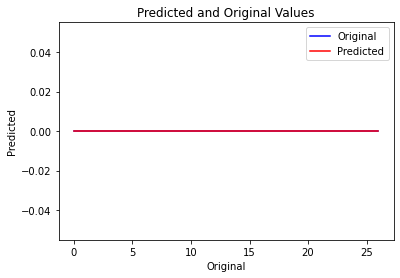

In [12]:
import matplotlib.pyplot as plt
plt.plot(y_test,'b',label='Original')
plt.plot(y_pred,'r',label='Predicted')
plt.title('Predicted and Original Values')
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.legend()
plt.show()

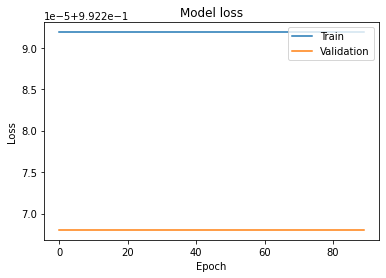

In [13]:
# Plot the training loss as a function of the number of epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [14]:
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 score", f1)
precision = precision_score(y_test, y_pred, average='macro')
print("Precision score", precision)
recall = recall_score(y_test, y_pred, average='macro')
print("Recall score", recall)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

F1 score 1.0
Precision score 1.0
Recall score 1.0
Confusion Matrix: 
 [[27]]
